In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
scow = xr.open_dataset('http://wilson.coas.oregonstate.edu:8080/thredds/dodsC/CIOSS/SCOW/Monthly/scow_monthly_maps.nc')
scow

<xarray.Dataset>
Dimensions:                      (latitude: 560, longitude: 1440, time: 12)
Coordinates:
  * latitude                     (latitude) float32 -69.875 -69.625 -69.375 ...
  * longitude                    (longitude) float32 0.125 0.375 0.625 0.875 ...
  * time                         (time) datetime64[ns] 2001-01-01 2001-02-01 ...
Data variables:
    scow_wind_curl               (time, longitude, latitude) float64 ...
    scow_wind_divergence         (time, longitude, latitude) float64 ...
    scow_wind_stress_curl        (time, longitude, latitude) float64 ...
    scow_wind_stress_divergence  (time, longitude, latitude) float64 ...
    scow_zonal_wind_stress       (time, longitude, latitude) float64 ...
    scow_meridional_wind_stress  (time, longitude, latitude) float64 ...
    scow_wind_stress_magnitude   (time, longitude, latitude) float64 ...
    scow_zonal_wind              (time, longitude, latitude) float64 ...
    scow_meridional_wind         (time, longitude, l

In [3]:
# create an annual mean
swow_am = scow.mean(dim='time').load()
scow_am

<xarray.Dataset>
Dimensions:                      (latitude: 560, longitude: 1440)
Coordinates:
  * latitude                     (latitude) float32 -69.875 -69.625 -69.375 ...
  * longitude                    (longitude) float32 0.125 0.375 0.625 0.875 ...
Data variables:
    scow_wind_curl               (longitude, latitude) float64 nan nan nan ...
    scow_wind_divergence         (longitude, latitude) float64 nan nan nan ...
    scow_wind_stress_curl        (longitude, latitude) float64 nan nan nan ...
    scow_wind_stress_divergence  (longitude, latitude) float64 nan nan nan ...
    scow_zonal_wind_stress       (longitude, latitude) float64 nan nan nan ...
    scow_meridional_wind_stress  (longitude, latitude) float64 nan nan nan ...
    scow_wind_stress_magnitude   (longitude, latitude) float64 nan nan nan ...
    scow_zonal_wind              (longitude, latitude) float64 nan nan nan ...
    scow_meridional_wind         (longitude, latitude) float64 nan nan nan ...
    scow_wind_sp

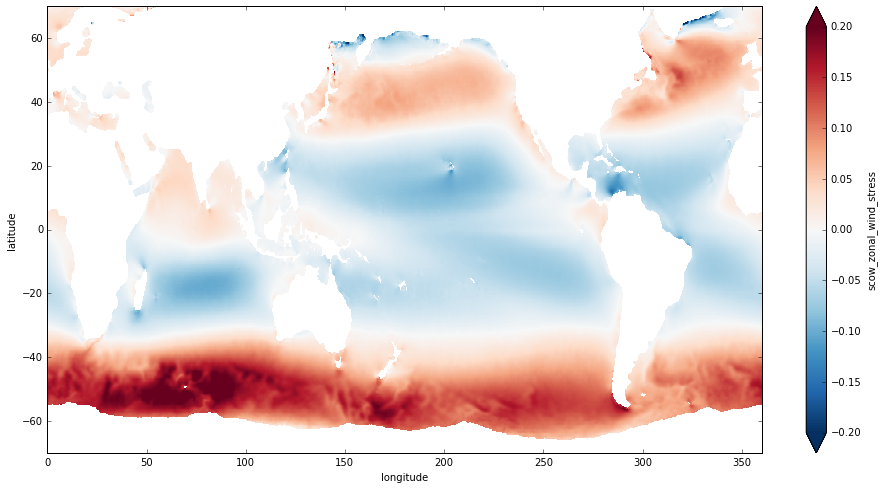

In [11]:
plt.figure(figsize=(16,8))
scow_am.scow_zonal_wind_stress.T.plot(vmax=0.2)


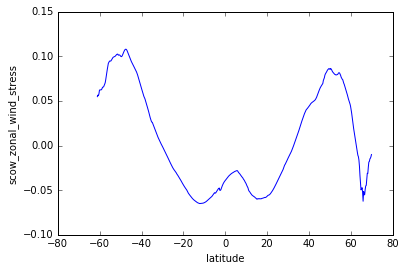

In [14]:
scow_am.scow_zonal_wind_stress.sel(longitude=slice(300,350)).mean(dim='longitude').plot()

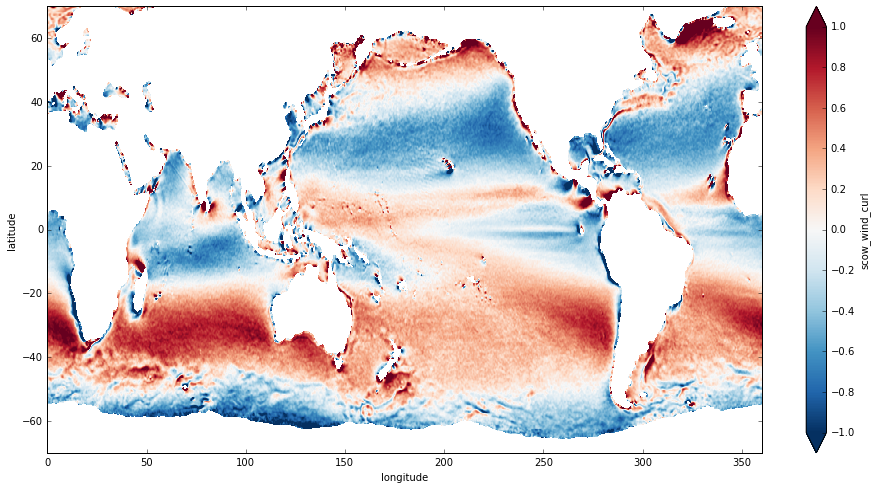

In [7]:
plt.figure(figsize=(16,8))
scow_am.scow_wind_curl.T.plot(vmin=-1)


In [18]:
url = ('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/'
#                        '.Grid-1x1/.Annual/dods')
                         '.Grid-1x1/.Annual/.temperature/dods')
woa_temp = xr.open_dataset(url)
#woa = woa.merge(woa_mask)
#woa

RuntimeError: NetCDF: file not found

In [12]:
import netCDF4
url  = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Grid-1x1/.Annual/.phosphate/dods'
nc = netCDF4.Dataset(url)
nc.variables['lon'][:]

RuntimeError: NetCDF: file not found

In [32]:
ssh = xr.open_dataset('http://opendap.aviso.altimetry.fr/thredds/dodsC/dataset-duacs-dt-global-allsat-madt-h')
ssh

RuntimeError: NetCDF: Authorization failure